## House Price Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv("RealState.csv")

D = pd.DataFrame(df)

housing = D.iloc[1:,1:]

housing.rename(columns={
    'X1 transaction date' : 'transaction date',
    'X2 house age' : 'house age',
    'X3 distance to the nearest MRT station': 'distance to the nearest MRT station',
    'X4 number of convenience stores': 'number of convenience stores',
    'X5 latitude' : 'latitude',
    'X6 longitude' : 'longitude',
    'Y house price of unit area':'Price'
},inplace=True)



print("Columns:-",housing.columns)

Columns:- Index(['transaction date', 'house age', 'distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude', 'Price'],
      dtype='object')


In [2]:
# print(housing.info())
# housing['price'].value_counts()

## Train Test Splitting

In [3]:
# Plotting The Graph for data visulization
# housing.hist(bins=50,figsize=(18,12))

In [4]:
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     # print(shuffled)
#     test_set_size = int(len(data)* test_ratio)
#     test_indices  = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

# train_set,test_set= split_train_test(housing,0.2)

# print(f"Rows in Train set :{len(train_set)}")
# print(f"Rows in Test set :{len(test_set)}")
 
#  This above is Only For Explanation 

train_set,test_set = train_test_split(housing ,test_size= 0.2, random_state=42)

print(f"Rows in Train set:- {len(train_set)}")
print(f"Rows in Test set:- {len(test_set)}")

Rows in Train set:- 330
Rows in Test set:- 83


In [5]:
# split = StratifiedShuffleSplit(n_splits=2,test_size=0.2,random_state=42)
# for train_set,test_set in split.split(housing,housing['waterfront']):
#     strat_train_set = housing.loc[train_set]
#     strat_test_set = housing.loc[test_set]

# Looking for Correlations

In [6]:
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix['Price'].sort_values(ascending=False))

Price                                  1.000000
number of convenience stores           0.573840
latitude                               0.547162
longitude                              0.523421
transaction date                       0.087551
house age                             -0.210952
distance to the nearest MRT station   -0.674137
Name: Price, dtype: float64


In [7]:
# Plotting the graph for visulization
# from pandas.plotting import scatter_matrix
# Attributes = ['price','sqft_above','bathrooms','yr_renovated']
# scatter_matrix(housing[Attributes],figsize=(12,8))
# housing.plot(kind='scatter', x='sqft_living',y='price', alpha=0.8)

## Trying Out Attribute  Combinations

In [8]:
Housing_train = train_set.drop("Price",axis=1)
Housing_labels = train_set["Price"].copy()

## Take Care of Missing Attributes , You have Three Options:
###   1. Get Rid Of The Missing Data Points
###   2. Get Rid Of The Whole attribute
###   3. Set The Value  To Some Value (0,Mean Or median)

In [9]:
# median = housing['Example'].median()
# housing["Exmaple"].fillna(median)  # Option 3
# cols_to_drop = ["country", "date", "statezip", "street", "city"]
# housing_num = housing.drop(cols_to_drop, axis=1)

# imputer = SimpleImputer()
# housing_num = housing.drop(["country", "date", "statezip", "street","city"],axis=1)


# imputer.fit(housing_num)


# housing_tr = imputer.transform(housing_num)


# housing_tr = pd.DataFrame(housing_tr, columns=housing_num.columns)
# imputer.statistics_


## Scikit-learn Design

### primarily,Three  Types of Objects 

1. Estimators - It estimates some Parameter based on a dataset  Eg. imputer .
It has a Fit method and transform method.
Fit method - Fits The Dataset And  Calculates internal parameters

2. Transformers - Transform method Takes input and returns  output based on the learnings from fit(). it has a convenience function   called fit_transform () which fits and then  transform

3. Predictors - LinearRegression model is an exmaple of Predictor.fit() and predict() are two  common functions . it also give score () functions .it also give score () functions which will evalute The predictions
 

Primarliy, two types of scaling methods:
1. min-max scaling (Normalization)
(Value-min)/(Max-min) 
Sklearn Provides a class called MinMaxScaler for this

2. Standardization
(value-mean)/std
Sklearn Provides a class called StandardScaler for this


### creating a PipeLine

In [10]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

Housing_prepared = my_pipeline.fit_transform(Housing_train)


# Housing_prepared

## Selecting a Desired  Model For Dragon Real Estates

In [11]:
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor() 
model.fit(Housing_prepared,Housing_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
some_data = Housing_train.iloc[3:5]
some_labels = Housing_labels.iloc[3:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([42.83 , 27.828])

In [13]:
print(list(some_labels))

[39.4, 28.8]


## Evaluating The Model

In [14]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(Housing_prepared)
mse = mean_squared_error(Housing_labels,housing_predictions)
rmse = np.sqrt(mse)
# print(Housing_labels)

In [15]:
print(mse)
print(rmse) 

8.420108362561074
2.9017422977516585


In [16]:
scores = cross_val_score(model,Housing_train,Housing_labels,scoring="neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)

In [17]:
np.round(rmse_scores,2)
def print_scores(scores):
    print("Scores:",scores)
    print("Mean: ",np.round(scores.mean(),2))
    print("Standard deviation: ",np.round(scores.std(),2))

In [18]:
print_scores(rmse_scores)

Scores: [ 5.623925    6.9205921   6.40900829  8.29961951  9.7377985   7.38947663
  6.56740835 14.30718109  3.90428599  7.2802393 ]
Mean:  7.64
Standard deviation:  2.66


### Saving The Model

In [19]:
from joblib import dump,load
dump(model,'Dragon.joblib')
print(test_set.columns)

Index(['transaction date', 'house age', 'distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude', 'Price'],
      dtype='object')


## Testing The Model ON Test Data

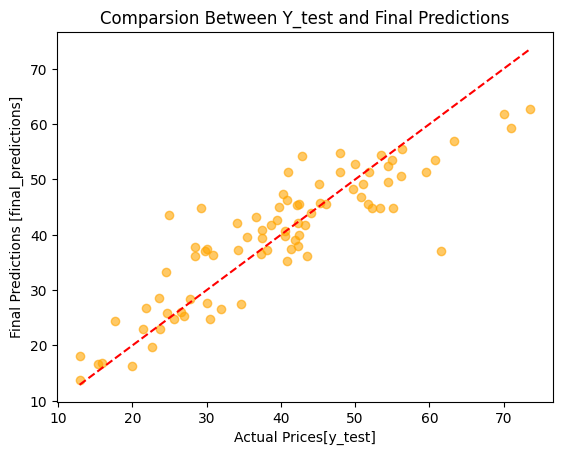

In [20]:
x_test = test_set.drop("Price",axis=1)
y_test = test_set['Price'].copy()
x_prepared_test = my_pipeline.transform(x_test)
final_predictions = model.predict(x_prepared_test)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

plt.scatter(y_test,final_predictions,color = 'orange',alpha=0.6)
plt.title("Comparsion Between Y_test and Final Predictions")
plt.xlabel('Actual Prices[y_test]')
plt.ylabel('Final Predictions [final_predictions]')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.show()

In [21]:
print(f"Mean_Squared_Error:-",np.round(final_mse),2)
print(f"Root_Mean_Squared_Error:-",np.round(final_rmse),2)

Mean_Squared_Error:- 41.0 2
Root_Mean_Squared_Error:- 6.0 2


In [22]:
print(Housing_labels.describe())

count    330.000000
mean      37.527273
std       13.601092
min        7.600000
25%       27.075000
50%       38.100000
75%       46.175000
max      117.500000
Name: Price, dtype: float64
